In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,4


In [145]:
attFeatures = []
for i in data.columns:
    attFeatures.append([i,data[i].dtype, data[i].nunique(), data[i].sort_values().drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features','Type', 'Unique Number', 'Values'])

,Features,Type,Unique Number,Values
0,ID,int64,129880,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Gender,object,2,"[Female, Male]"
2,Age,int64,75,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
3,Customer Type,object,2,"[First-time, Returning]"
4,Type of Travel,object,2,"[Business, Personal]"
5,Class,object,3,"[Business, Economy, Economy Plus]"
6,Flight Distance,int64,3821,"[31, 56, 67, 73, 74, 76, 77, 78, 80, 82, 83, 8..."
7,Departure Delay,int64,466,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
8,Arrival Delay,float64,472,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
9,Departure and Arrival Time Convenience,int64,6,"[0, 1, 2, 3, 4, 5]"


In [148]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,3.068278
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.993292
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [150]:
print(data.isnull().sum())

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [156]:
data['Arrival Delay'] = data['Arrival Delay'].fillna(data['Arrival Delay'].mean())

In [158]:
print(data.isnull().sum())

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

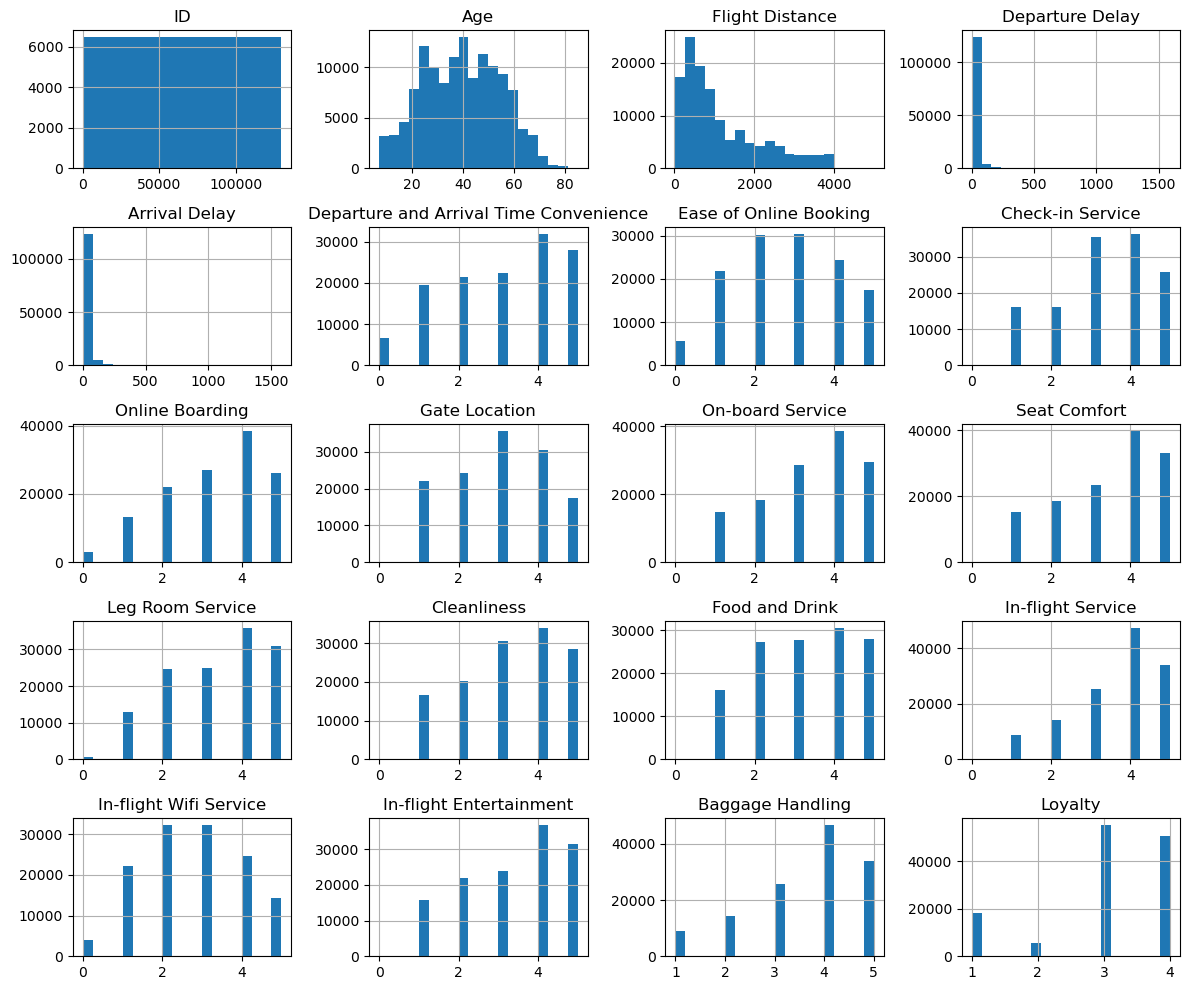

In [160]:
data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [162]:
# fit transform is used to ensure that 1 is assigned to Satisfied in Satifaction column
le = LabelEncoder()
data['Satisfaction'] = le.fit_transform(data['Satisfaction']) 

In [164]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
data[categorical_cols] = data[categorical_cols].apply(le.fit_transform)

In [166]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,1,48,0,0,0,821,2,5.0,3,...,5,2,5,5,5,3,5,5,0,1
1,2,0,35,1,0,0,821,26,39.0,2,...,4,5,5,3,5,2,5,5,1,4
2,3,1,41,1,0,0,853,0,0.0,4,...,5,3,5,5,3,4,3,3,1,4
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,1,4
4,5,0,49,1,0,0,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,1,4


In [168]:
# Drop the ID column
data = data.drop(data.columns[[0]], axis=1)
data = data.drop(data.columns[[0]], axis=1)
data = data.drop(columns=["Customer Type", "Satisfaction"])
data.head()

,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,48,0,0,821,2,5.0,3,3,4,3,...,3,5,2,5,5,5,3,5,5,1
1,35,0,0,821,26,39.0,2,2,3,5,...,5,4,5,5,3,5,2,5,5,4
2,41,0,0,853,0,0.0,4,4,4,5,...,3,5,3,5,5,3,4,3,3,4
3,50,0,0,1905,0,0.0,2,2,3,4,...,5,5,5,4,4,5,2,5,5,4
4,49,0,0,3470,0,1.0,3,3,3,5,...,3,4,4,5,4,3,3,3,3,4


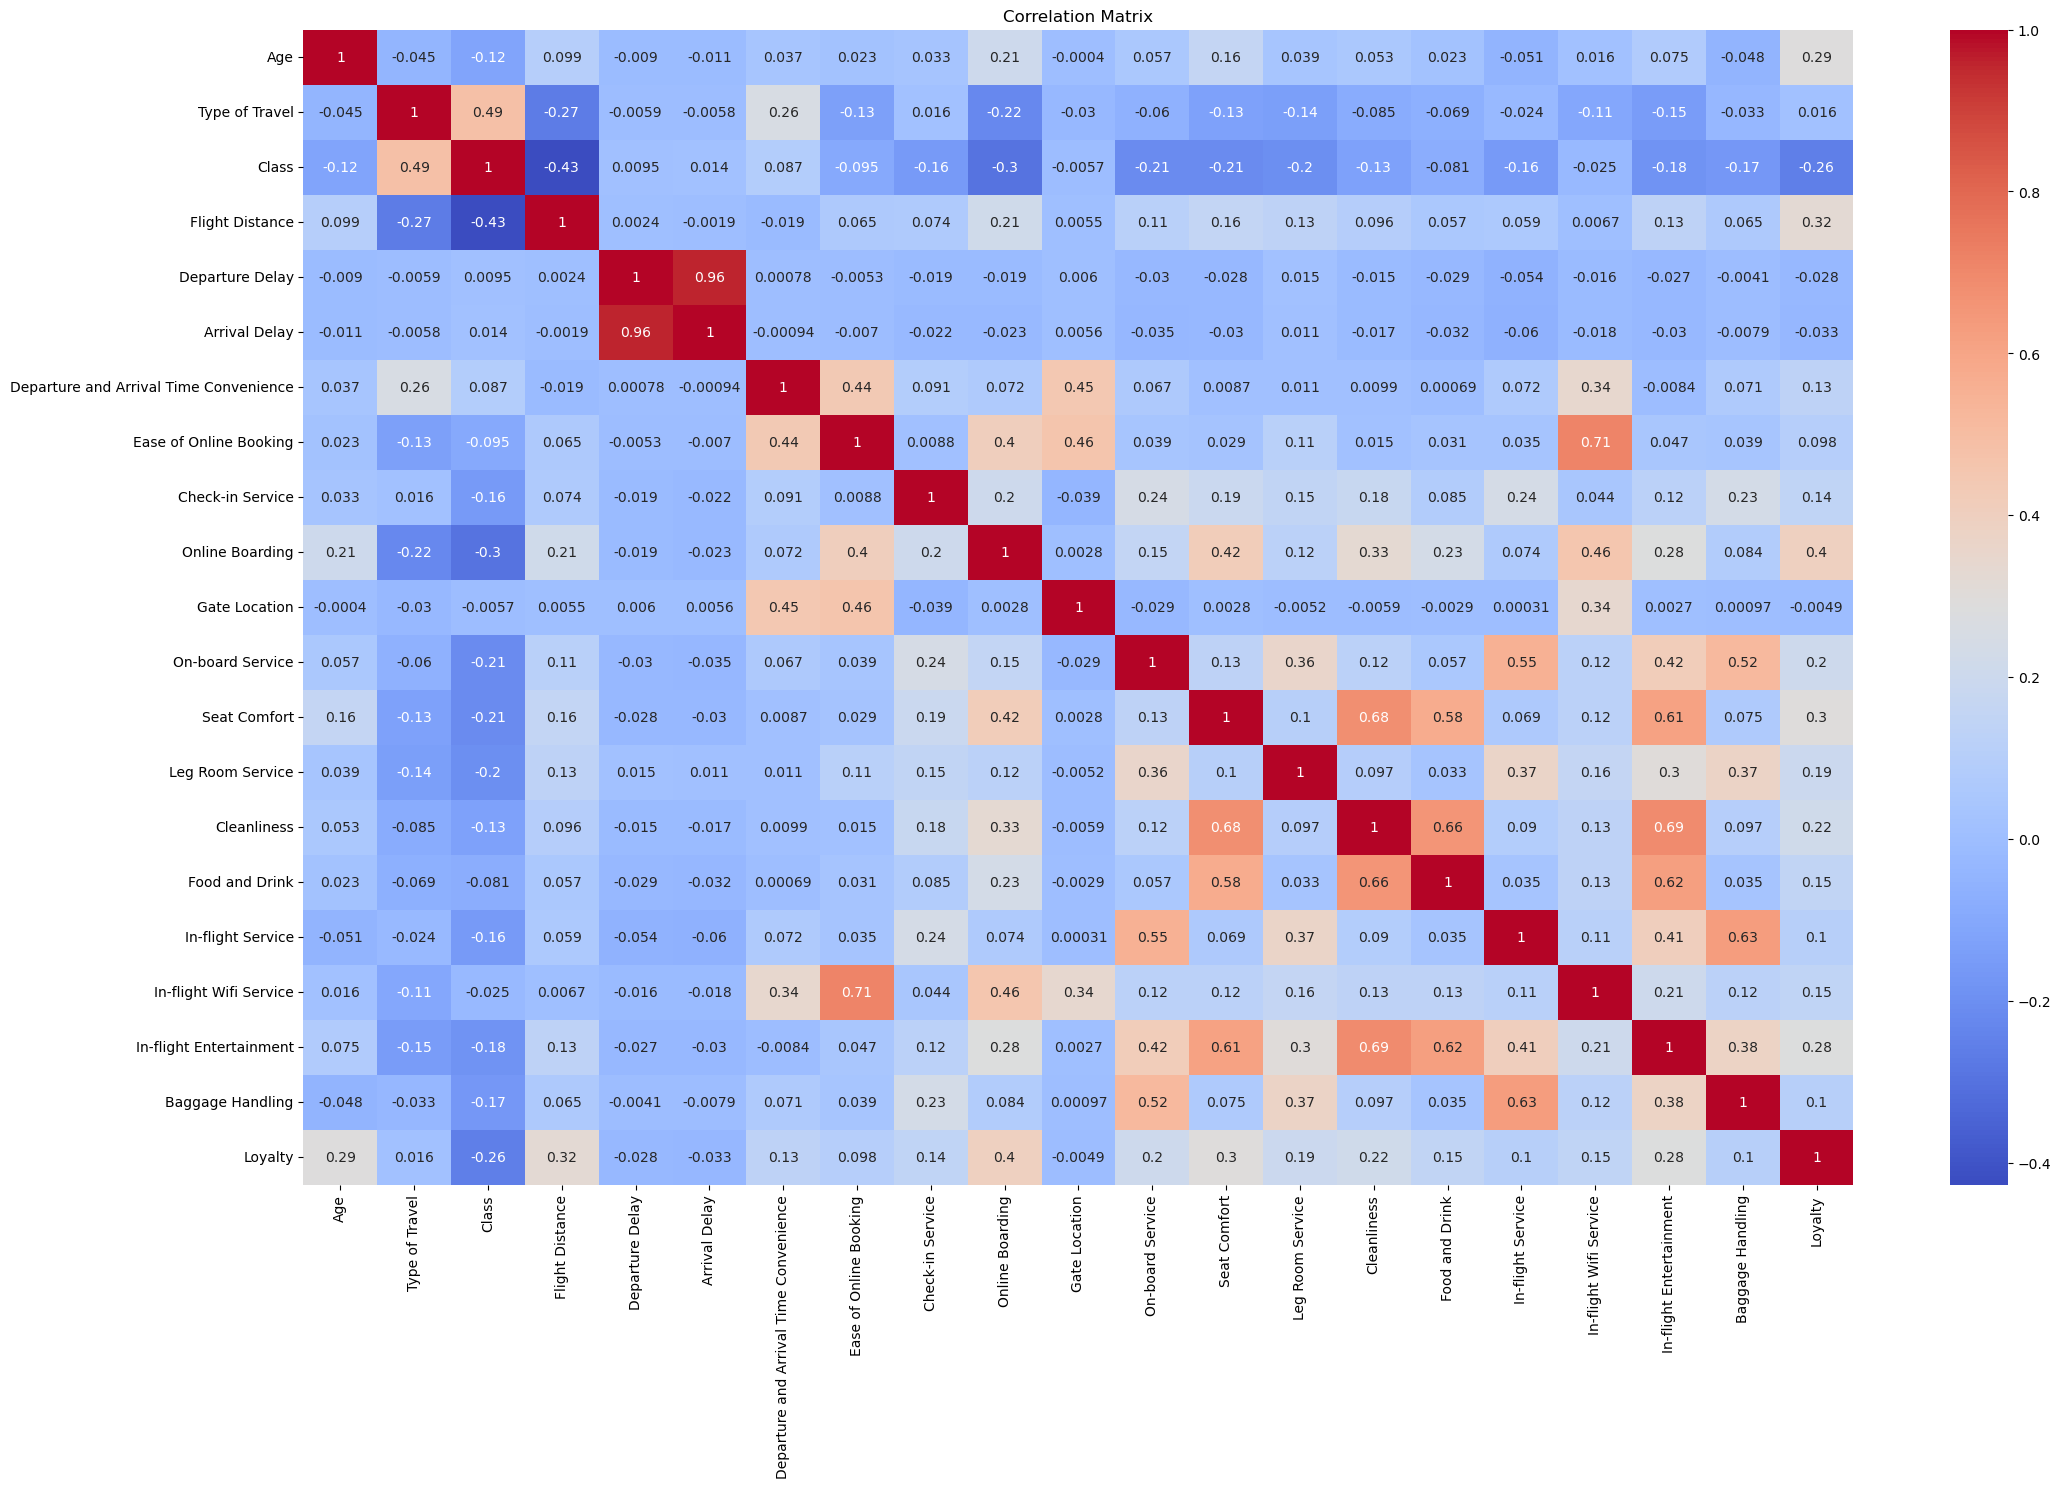

Loyalty                                   1.000000
Online Boarding                           0.397632
Flight Distance                           0.324759
Seat Comfort                              0.295743
Age                                       0.288204
In-flight Entertainment                   0.281277
Cleanliness                               0.216532
On-board Service                          0.202976
Leg Room Service                          0.192386
Food and Drink                            0.149850
In-flight Wifi Service                    0.145939
Check-in Service                          0.142726
Departure and Arrival Time Convenience    0.134012
Baggage Handling                          0.104731
In-flight Service                         0.104085
Ease of Online Booking                    0.098338
Type of Travel                            0.015530
Gate Location                            -0.004871
Departure Delay                          -0.028326
Arrival Delay                  

In [170]:
#Fetch the numberic values - all columns will be fetched as we have converted them to numeric value
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix['Loyalty'].sort_values(ascending=False))
    

Before resampling: Counter({3: 55372, 4: 50728, 1: 18080, 2: 5700})
After resampling: Counter({1: 55372, 4: 55372, 3: 55372, 2: 55372})


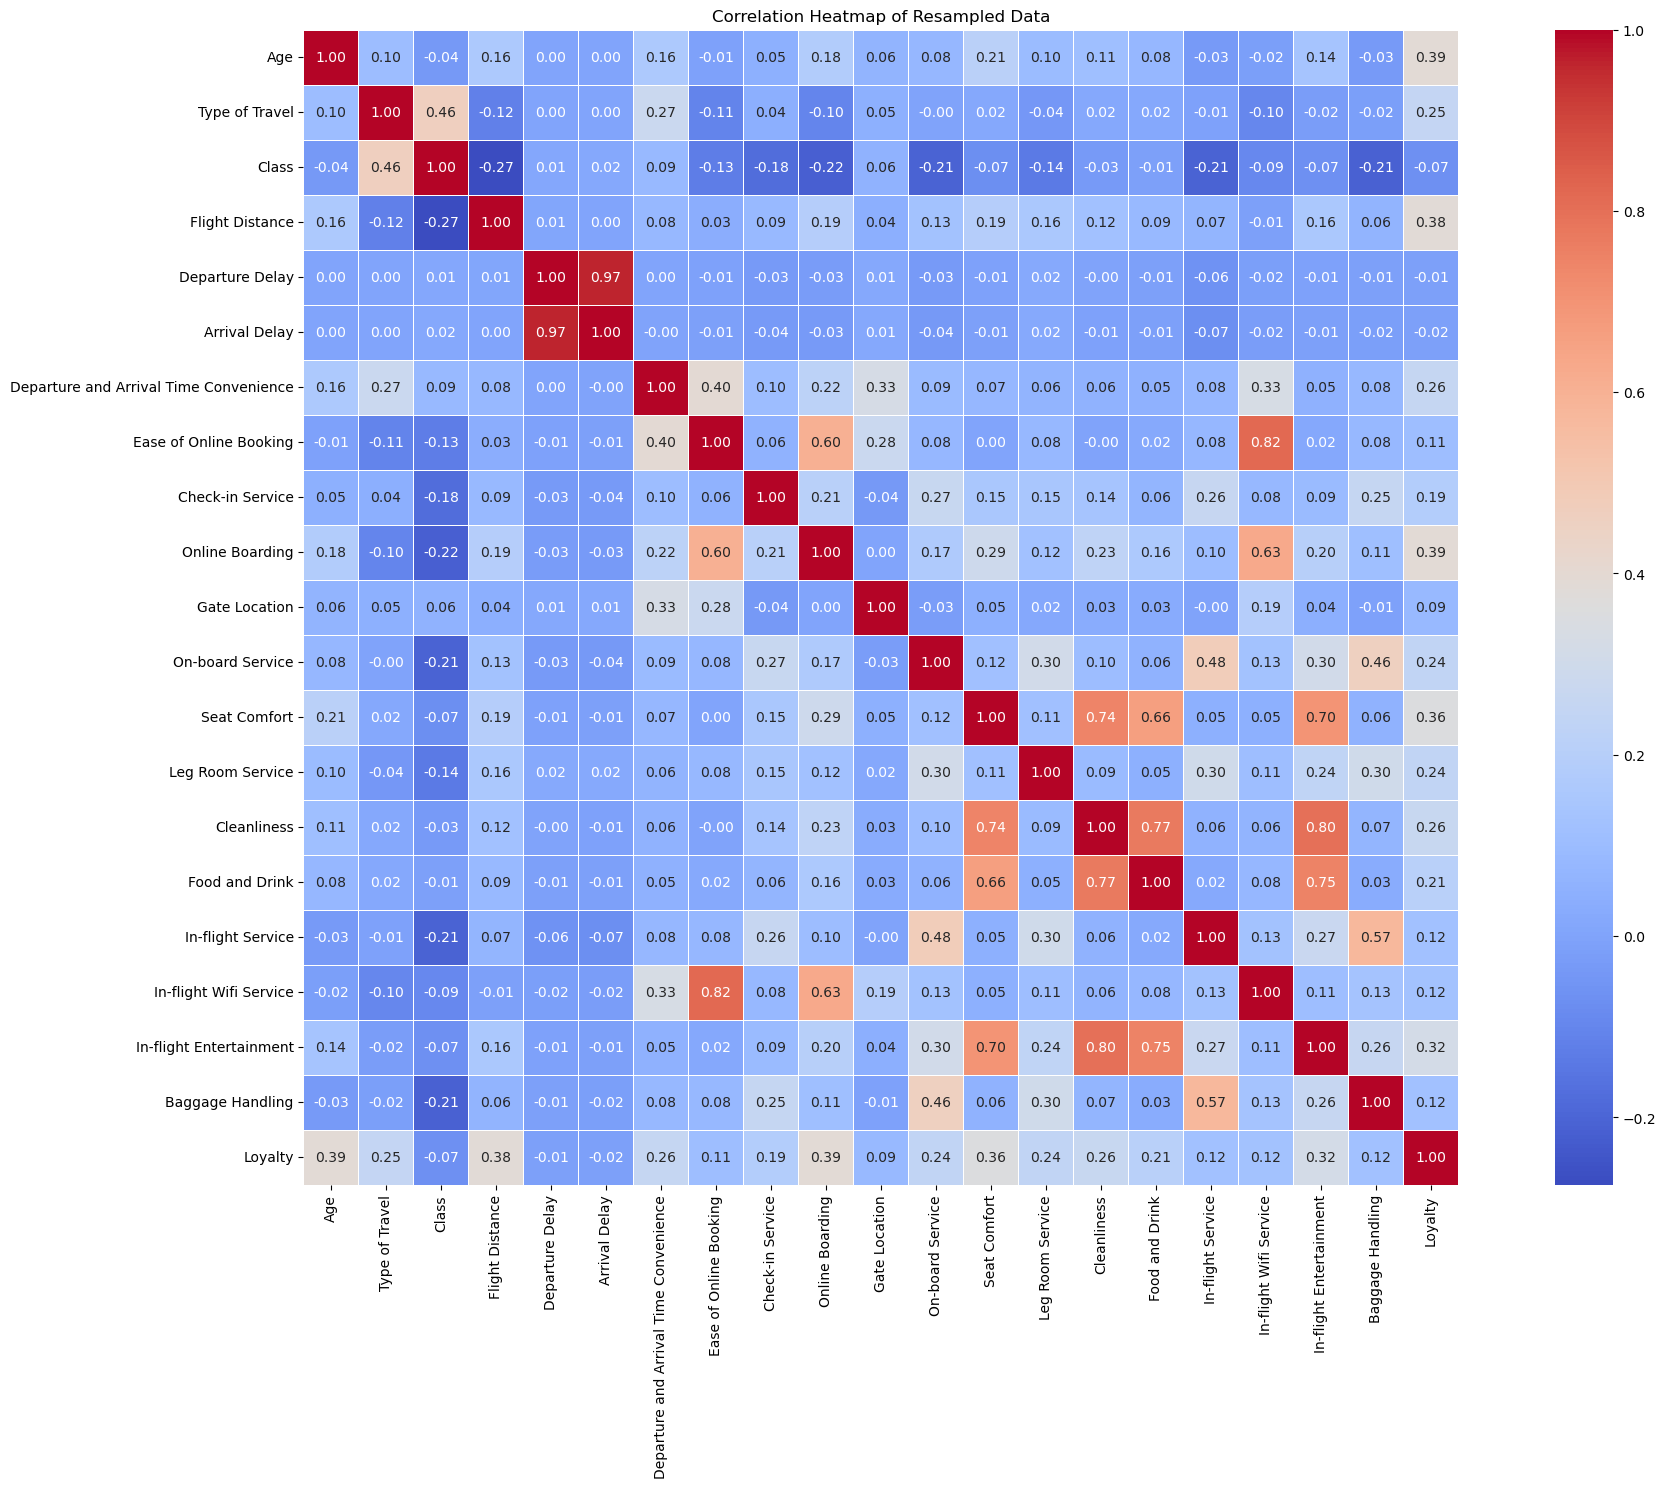

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Features (excluding 'Loyalty')
X = data.drop('Loyalty', axis=1)
y = data['Loyalty']

# Step 2: Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before resampling:", Counter(y))
print("After resampling:", Counter(y_resampled))

# Step 3: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Combine the resampled features and target into a DataFrame for visualization
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Loyalty'] = y_resampled

# Step 5: Calculate the correlation matrix
correlation_matrix = resampled_data.corr()

# Step 6: Set up the matplotlib figure for the heatmap
plt.figure(figsize=(25, 15))

# Step 7: Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Step 8: Set the title for the heatmap
plt.title('Correlation Heatmap of Resampled Data')

# Step 9: Show the heatmap plot
plt.show()



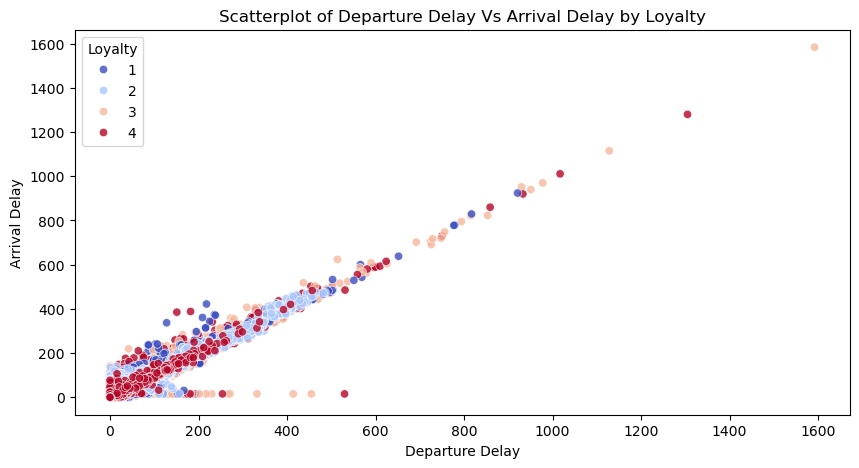

In [178]:

# Set the figure size and DPI for better quality
plt.figure(figsize=(10, 5), dpi=100)

# Plot a scatterplot to visualize the relationship between Arrival Delay and Departure Delay, colored by Satisfaction
sns.scatterplot(data=resampled_data, x='Departure Delay', y='Arrival Delay', hue='Loyalty', palette='coolwarm', alpha=0.8)

# Display the plot
plt.title('Scatterplot of Departure Delay Vs Arrival Delay by Loyalty')
plt.show()


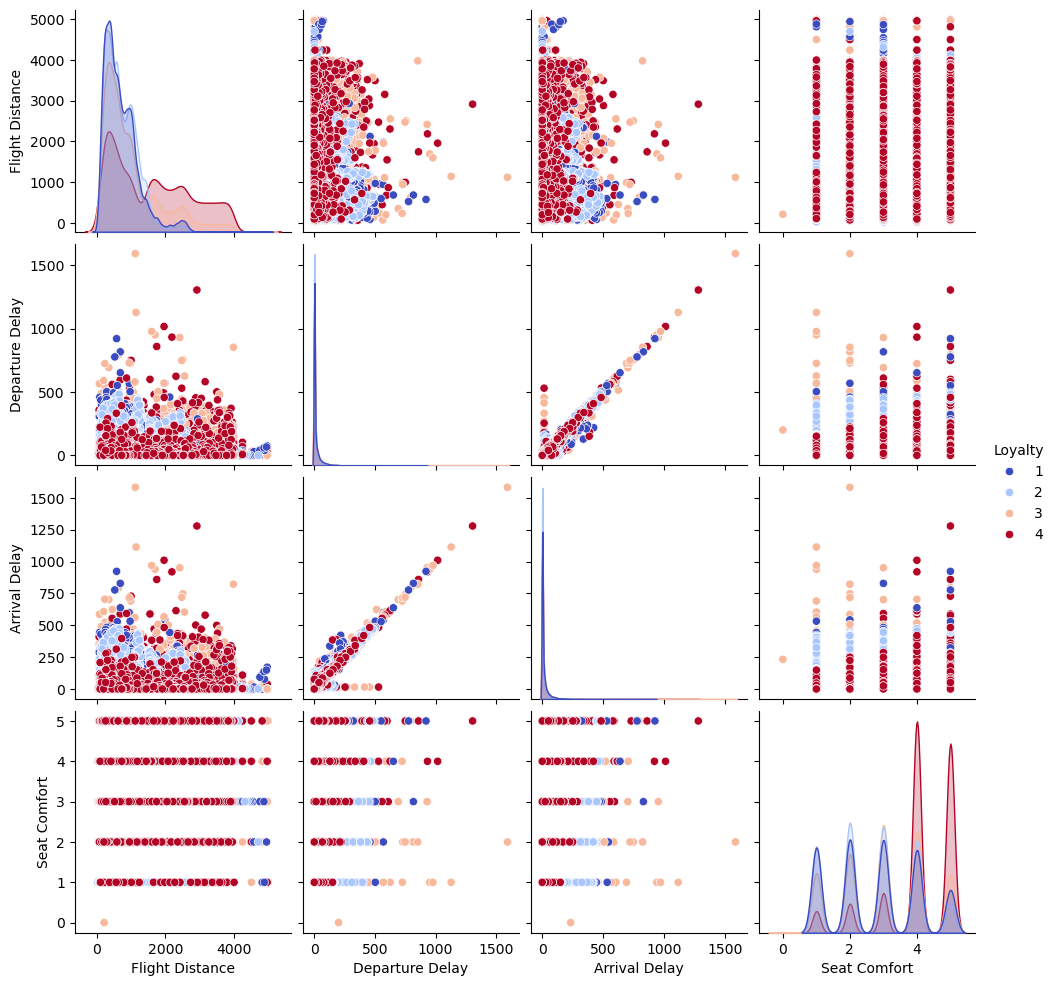

In [177]:

numerical_cols = ['Flight Distance', 'Departure Delay', 'Arrival Delay', 'Seat Comfort', 'Loyalty']
sns.pairplot(resampled_data[numerical_cols], hue='Loyalty', palette='coolwarm')
plt.show()


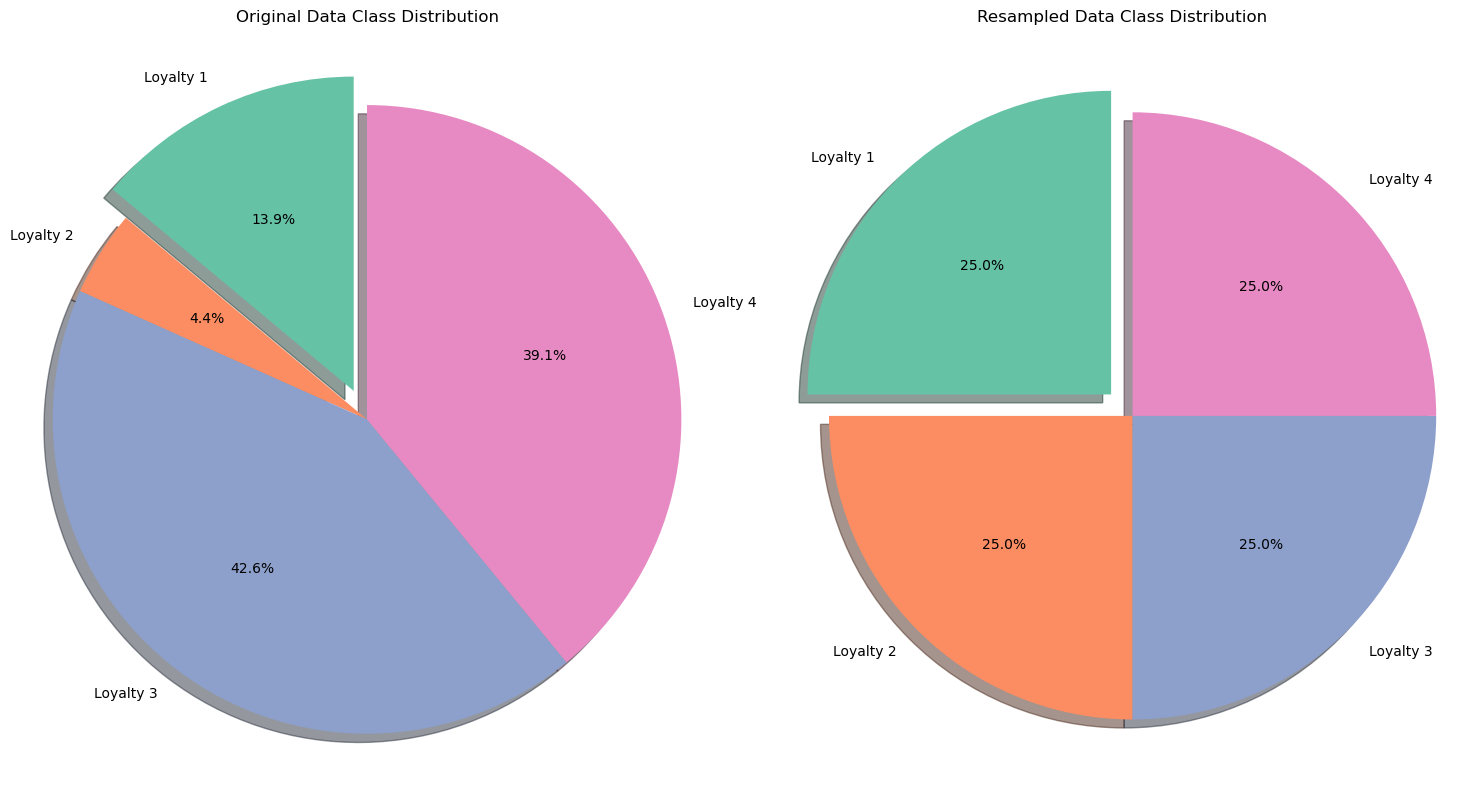

In [140]:
# Step 10: Visualize the resampling vs original
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sizes_original = [sum(y == 1), sum(y == 2), sum(y == 3), sum(y == 4)] 
labels = ['Loyalty 1', 'Loyalty 2', 'Loyalty 3', 'Loyalty 4']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
explode = (0.1, 0, 0, 0) 
axes[0].pie(sizes_original, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].axis('equal')  
axes[0].set_title('Original Data Class Distribution')

sizes_resampled = [sum(y_resampled == 1), sum(y_resampled == 2), sum(y_resampled == 3), sum(y_resampled == 4)]
axes[1].pie(sizes_resampled, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].axis('equal')  
axes[1].set_title('Resampled Data Class Distribution')

plt.tight_layout()
plt.show()



In [ ]:

# Step 11: Visualize training and testing data split
sizes = [len(y_train), len(y_test)]
labels = ['Training Data', 'Testing Data']
colors = ['#66c2a5', '#fc8d62']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Training and Testing Data Split')
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [63]:
# Specify the columns you want to describe
columns_to_describe = ['Age', 'Flight Distance','Loyalty']

# Use .describe() on the selected columns
description = data[columns_to_describe].describe()

# Print the description
print(description)

                 Age  Flight Distance        Loyalty
count  129880.000000    129880.000000  129880.000000
mean       39.427957      1190.316392       3.068278
std        15.119360       997.452477       0.993292
min         7.000000        31.000000       1.000000
25%        27.000000       414.000000       3.000000
50%        40.000000       844.000000       3.000000
75%        51.000000      1744.000000       4.000000
max        85.000000      4983.000000       4.000000


In [121]:
resampled_data.describe()

,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000,221488.000000
mean,0.182005,0.471547,1014.121989,14.110972,14.466293,2.736518,2.800486,3.231701,3.109649,2.809674,3.284860,3.150586,3.192557,3.081178,3.028209,3.634409,2.801231,3.132328,3.622571,2.500000
std,0.385850,0.579215,873.326213,36.827298,37.152961,1.593101,1.420583,1.187772,1.395026,1.192661,1.206318,1.332832,1.243651,1.302372,1.307751,1.095462,1.378655,1.322279,1.092548,1.118037
min,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,391.000000,0.000000,0.000000,1.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.750000
50%,0.000000,0.000000,731.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.500000
75%,0.000000,1.000000,1299.000000,11.000000,12.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.250000
max,1.000000,2.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
